Welcome to JupyROOT 6.14/04


0


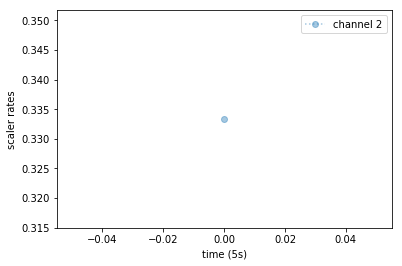

1


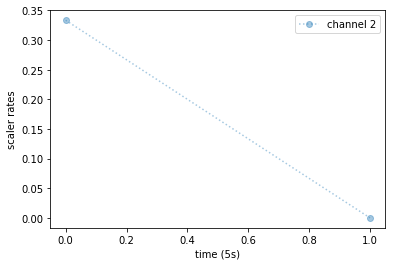

2


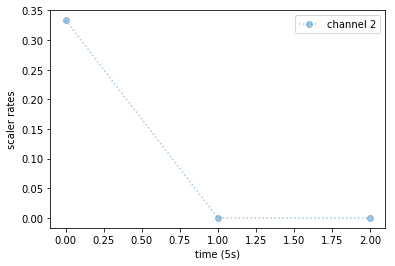

3


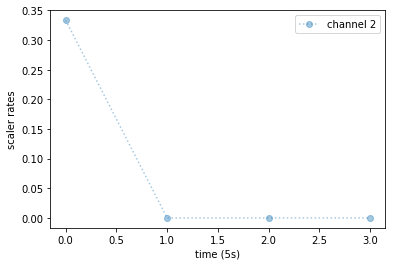

4


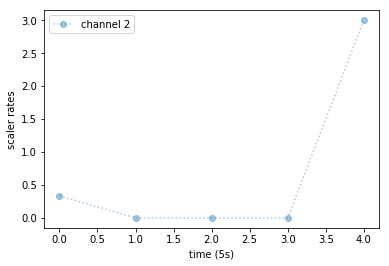

5


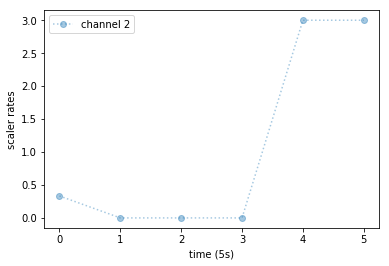

6


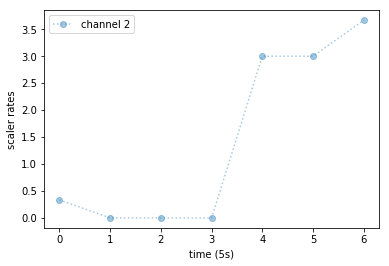

7


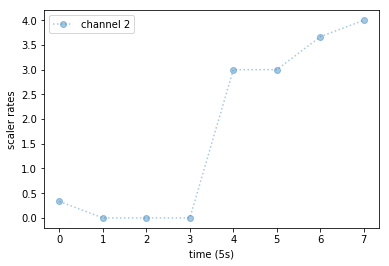

8


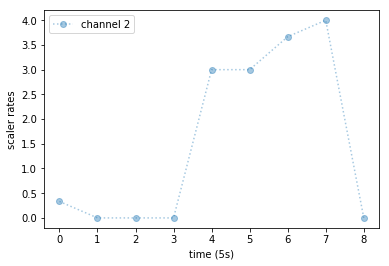

9


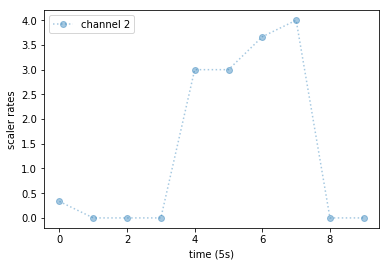

alll channles


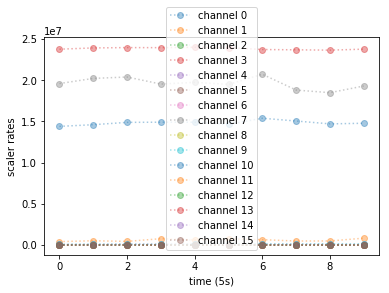

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import time
import tdc_daq as td
import db
import pasttrec_ctrl as ptc
import numpy as np
from my_utils import *
set_width_max_of_jupyterpad()

measure_board_list = ["0009"]
trend_scan_Xtitle = "time (5s)"  
trend_scan_Nsteps = 10
measure_time=3
ch = 2
average_scaler_list        =  [[ [0]  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
average_scaler_list_err    =  [[ [0]  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]



            
for name in measure_board_list: 
    for my_board in db.board_list():
           db.set_standby_board(my_board)
    db.unset_standby_board(name)
    td.enable_tdc_channels_of_active_boards()
    ptc.init_active_boards(10,4,5) 
    scaler_list = []
    for p in range(0,trend_scan_Nsteps):
        time.sleep(measure_time)
        print(p)
        scaler_rates = td.scaler_rate_of_board(name,measure_time) 
        average_scaler_list[measure_board_list.index(name)][p] =  scaler_rates    # average over measure_time in seconds   
        average_scaler_list_err[measure_board_list.index(name)][p] =  np.sqrt(scaler_rates*measure_time)/measure_time
        scaler_list += [ scaler_rates[ch] ]
        plt.errorbar(range(0,len(scaler_list)),scaler_list, yerr=None, xerr=None, fmt='o:', alpha=0.4,label = "channel {:d}".format(ch))
        plt.xlabel(trend_scan_Xtitle)
        plt.ylabel("scaler rates")
        plt.legend()
        plt.show()
        
    print("alll channles") 
    board_index = measure_board_list.index(name)        
    for ch in range(0,16): 
        scaler_list = [0]*len(average_scaler_list[board_index])
        for i in range(0,len(average_scaler_list[board_index])):
            scaler_list[i] = average_scaler_list[board_index][i][ch]
        plt.errorbar(range(0,len(scaler_list)),scaler_list, yerr=None, xerr=None, fmt='o:', alpha=0.4,label = "channel {:d}".format(ch))
        plt.xlabel(trend_scan_Xtitle)
        plt.ylabel("scaler rates")             
       # plt.show()
    plt.legend()
    plt.show()        
        
        
        
        
        
        
        
        
        

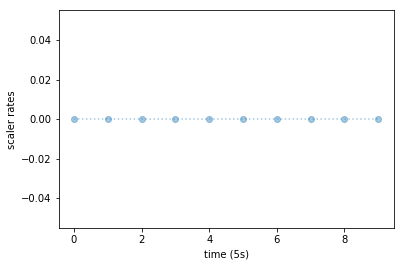

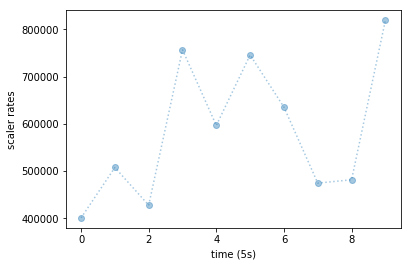

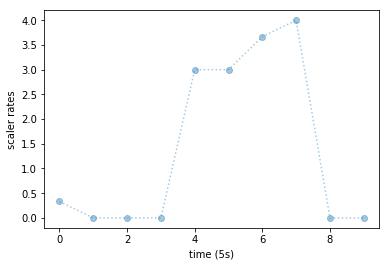

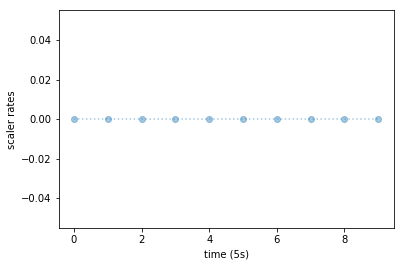

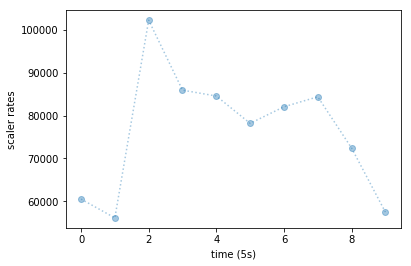

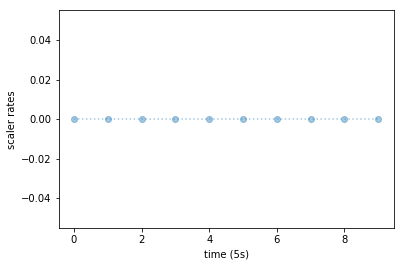

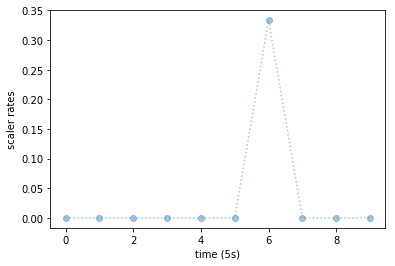

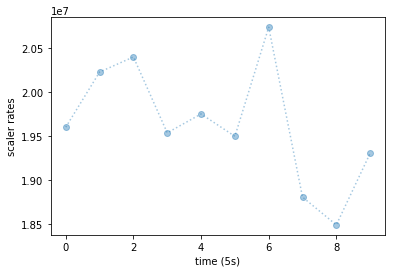

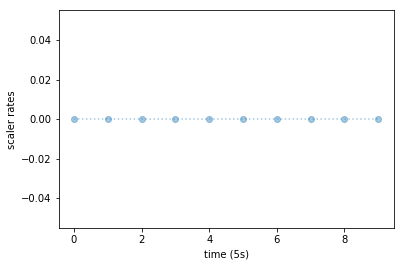

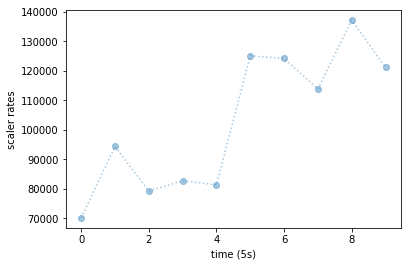

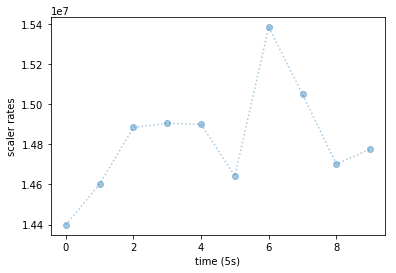

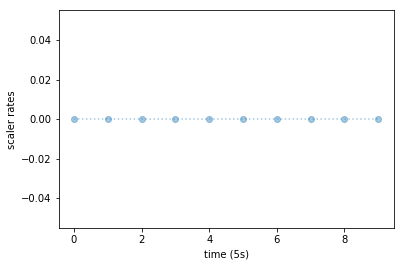

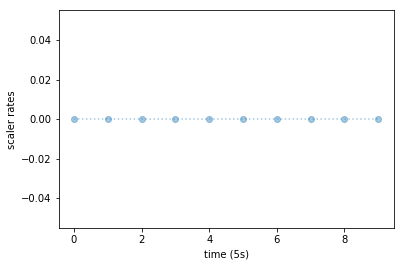

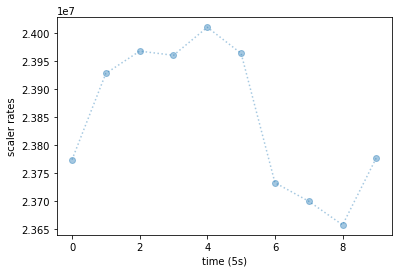

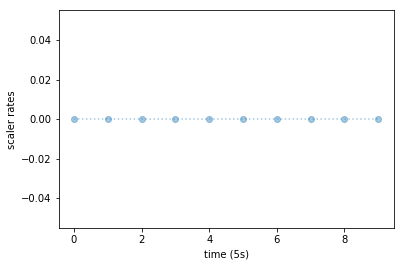

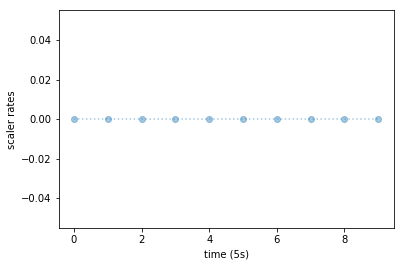

In [2]:
   
for ch in range(0,16): 
    scaler_list = [0]*len(average_scaler_list[board_index])
    for i in range(0,len(average_scaler_list[board_index])):
        scaler_list[i] = average_scaler_list[board_index][i][ch]
    plt.errorbar(range(0,len(scaler_list)),scaler_list, yerr=None, xerr=None, fmt='o:', alpha=0.4,label = "channel {:d}".format(ch))
    plt.xlabel(trend_scan_Xtitle)
    plt.ylabel("scaler rates")             
    plt.show()
#plt.legend()
    